In [1]:
# allows to import of modules
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
nb_dir
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
from pathlib import Path
from torch.utils.data import DataLoader
import torch.nn as nn
import torch
import numpy
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [3]:
import metrics
import train
import model
import dataset

In [4]:
torch.cuda.get_device_name(0)

'GeForce GTX 1660 Ti'

In [5]:
PATH = Path("/home/shaun/personal/acdc_challenge/data/")

In [6]:
images_path = PATH/"train/images"
labels_path = PATH/"train/labels"

In [7]:
ds = dataset.HeartDataSet(images_path, labels_path)

In [8]:
loader = DataLoader(ds, batch_size=8,shuffle=True)

In [9]:
data, label = ds[6]

In [10]:
data.shape

torch.Size([1, 256, 256])

In [11]:
label.cpu().numpy()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

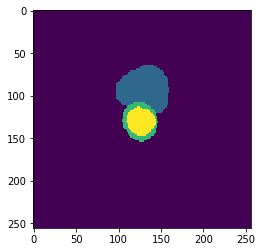

In [14]:
plt.imshow(label.cpu().numpy())

In [18]:
# lbl_one = torch.reshape(torch.nn.functional.one_hot(label.to(torch.int64), 4), (4,256,256))

In [19]:
# lbl_one

In [20]:
# plt.imshow(np.argmax(lbl_one.cpu().numpy().reshape(256,256,4), axis=2))

In [21]:
from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('data/runs/tests9/')

In [22]:
# get metrics
acc =  metrics.Accuracy()
miou = metrics.Miou()
manager = metrics.MetricManager([acc, miou], writer)

In [ ]:
n_classes = 4

In [23]:
net = model.ResNetUNet(n_classes)

In [29]:
net.cuda()
2

2

In [116]:
# net.double()
# net.train()

In [117]:
# criterion = nn.BCEWithLogitsLoss()
# criterion = nn.CrossEntropyLoss(weight=torch.tensor([1e-3,1,1,1], device="cuda"))
# criterion = nn.CrossEntropyLoss()


# optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
# optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

In [119]:
# pred = np.argmax(x.detach().cpu().numpy(), axis=1)

In [120]:
# np.argmax(label.cpu().numpy(), axis=0)

In [121]:
# net.train()

ResNetUNet(
  (base_model): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

In [122]:
# trainer = train.Training(manager, criterion, optimizer, loader, 5, net)

In [123]:
# trainer.train()

Epoch 0/5
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5


In [124]:
# torch.save(net.state_dict(), "../data/model.pth")

In [24]:
net.load_state_dict(torch.load( "../data/model.pth"))
net.eval()

ResNetUNet(
  (base_model): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

In [25]:
import matplotlib.pyplot as plt

In [54]:
data, label = ds[80]

In [55]:
# data.shape

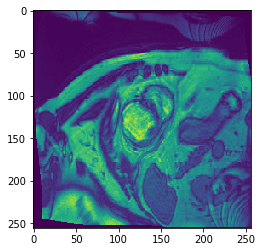

In [68]:
plt.imshow((data.mean(dim=0)*255).detach().cpu().numpy())

In [57]:
x = net(data[None])#.cpu())
# plt.imshow(np.argmax(x.detach().cpu().numpy().reshape(256,256,4), axis=0))
# pred = np.argmax(x.detach().cpu().numpy(), axis=1)

In [58]:
res = x.detach().cpu().numpy()

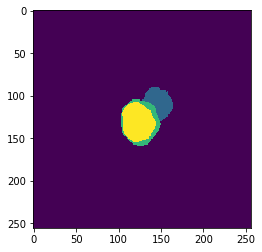

In [67]:
# plt.axis('off')
plt.imshow(label.detach().cpu().numpy())

In [65]:
images_path = PATH/"validation/images/"
labels_path = PATH/"validation/labels/"
ds = data.HeartDataSet(images_path, labels_path)

In [66]:
data, label = ds[29]

In [69]:
x = net(data[None])
res = x.detach().cpu().numpy()

In [70]:
ar = np.argmax(res, axis=1)

In [71]:
ar[0].shape

(256, 256)

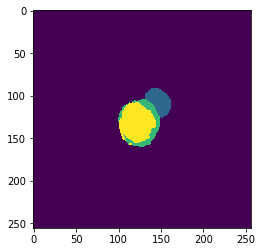

In [72]:
plt.imshow(ar[0])

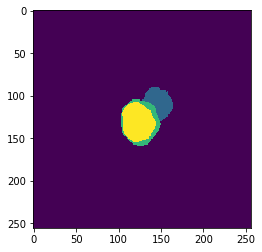

In [175]:
plt.imshow(label.detach().cpu().numpy())

In [176]:
l = torch.nn.Sigmoid()

In [42]:
a = l(x)

In [43]:
a.shape

torch.Size([1, 4, 256, 256])

In [44]:
a

tensor([[[[9.9997e-01, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
           1.0000e+00, 1.0000e+00],
          [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
           1.0000e+00, 1.0000e+00],
          [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
           1.0000e+00, 1.0000e+00],
          ...,
          [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
           1.0000e+00, 1.0000e+00],
          [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
           1.0000e+00, 1.0000e+00],
          [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
           1.0000e+00, 1.0000e+00]],

         [[4.4777e-02, 3.9038e-03, 1.5160e-03,  ..., 7.9131e-05,
           1.9883e-04, 4.3119e-03],
          [9.1445e-02, 8.9056e-03, 3.8313e-03,  ..., 1.6749e-03,
           2.0896e-03, 1.1613e-02],
          [1.3142e-01, 1.5047e-02, 7.1790e-03,  ..., 4.7257e-03,
           4.6368e-03, 1.6800e-02],
          ...,
          [8.6218e-02, 4.8092e-03, 2.2978e-03,  ..., 3.8682

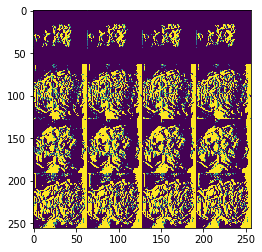

In [45]:
# x = net(data[None])
plt.imshow(np.argmax(a.detach().cpu().numpy().reshape(256,256,4), axis=2))

In [46]:
np.argmax(a.detach().cpu().numpy().reshape(256,256,4), axis=2)[0]

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# plt.imshow(pred[0])

In [ ]:
# plt.imshow(np.argmax(label.cpu().numpy(), axis=1))